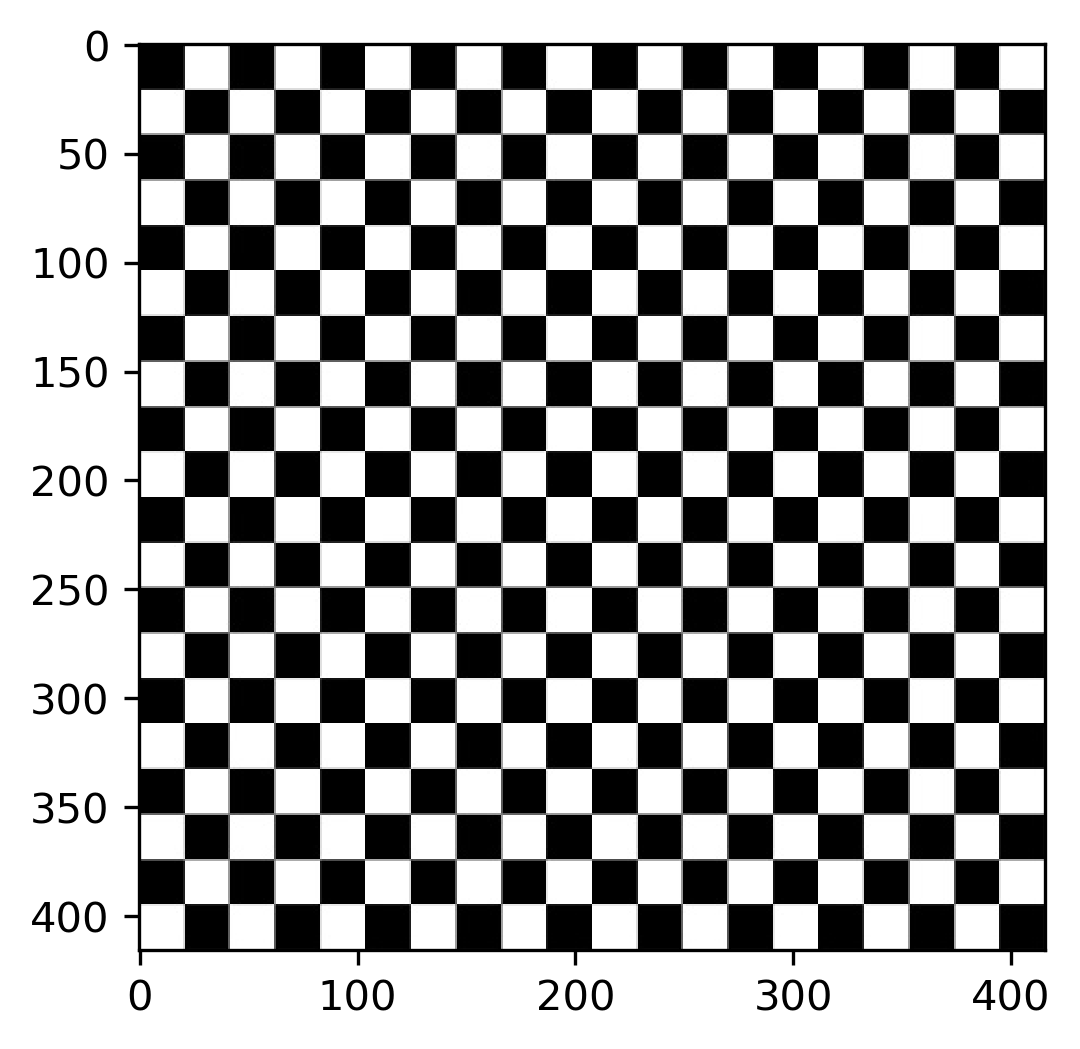

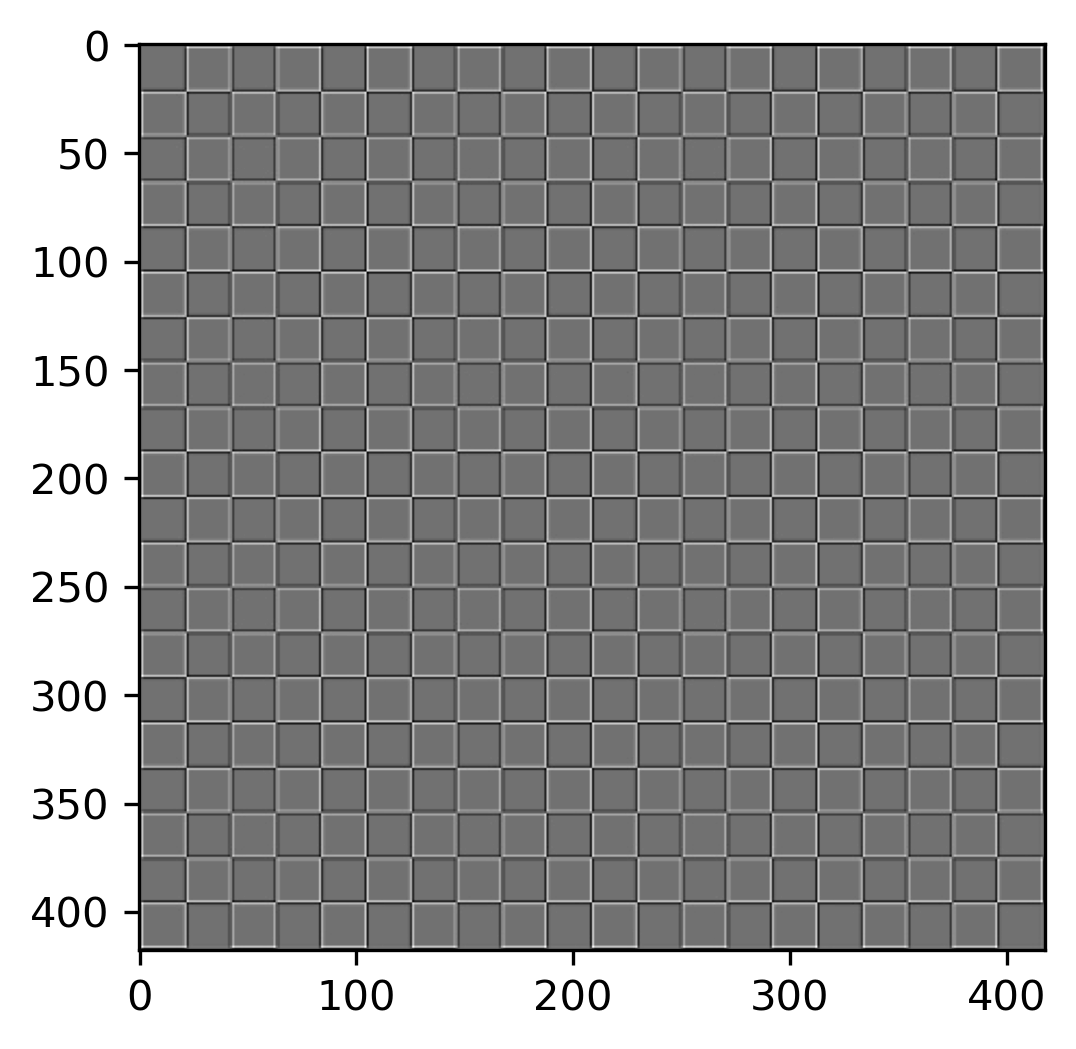

In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from colour.plotting import *
import colour


check = plt.imread("chess.jpg")

plt.figure(dpi=300)
plt.imshow(check, cmap='gray', interpolation='nearest')

edge_filter = np.array([[-1, -1, -1],

                   [-1, 8, -1],

                   [-1, -1, -1]]) 

grad = signal.convolve2d(check, edge_filter)

plt.figure(dpi=300)
plt.imshow(grad, cmap="gray")

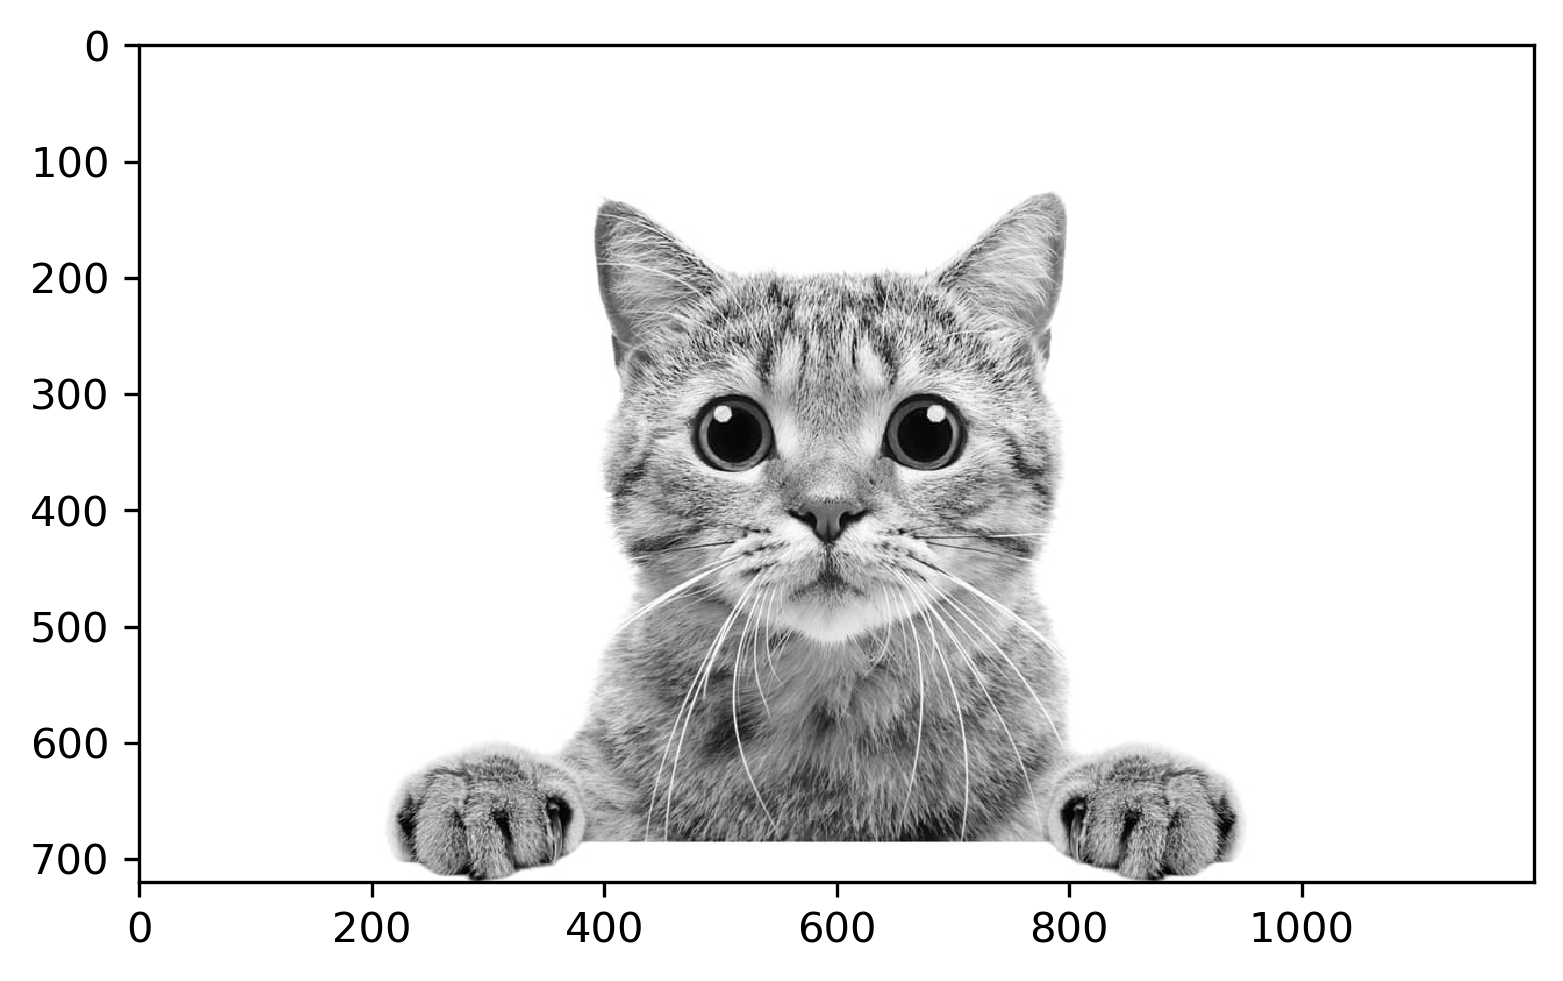

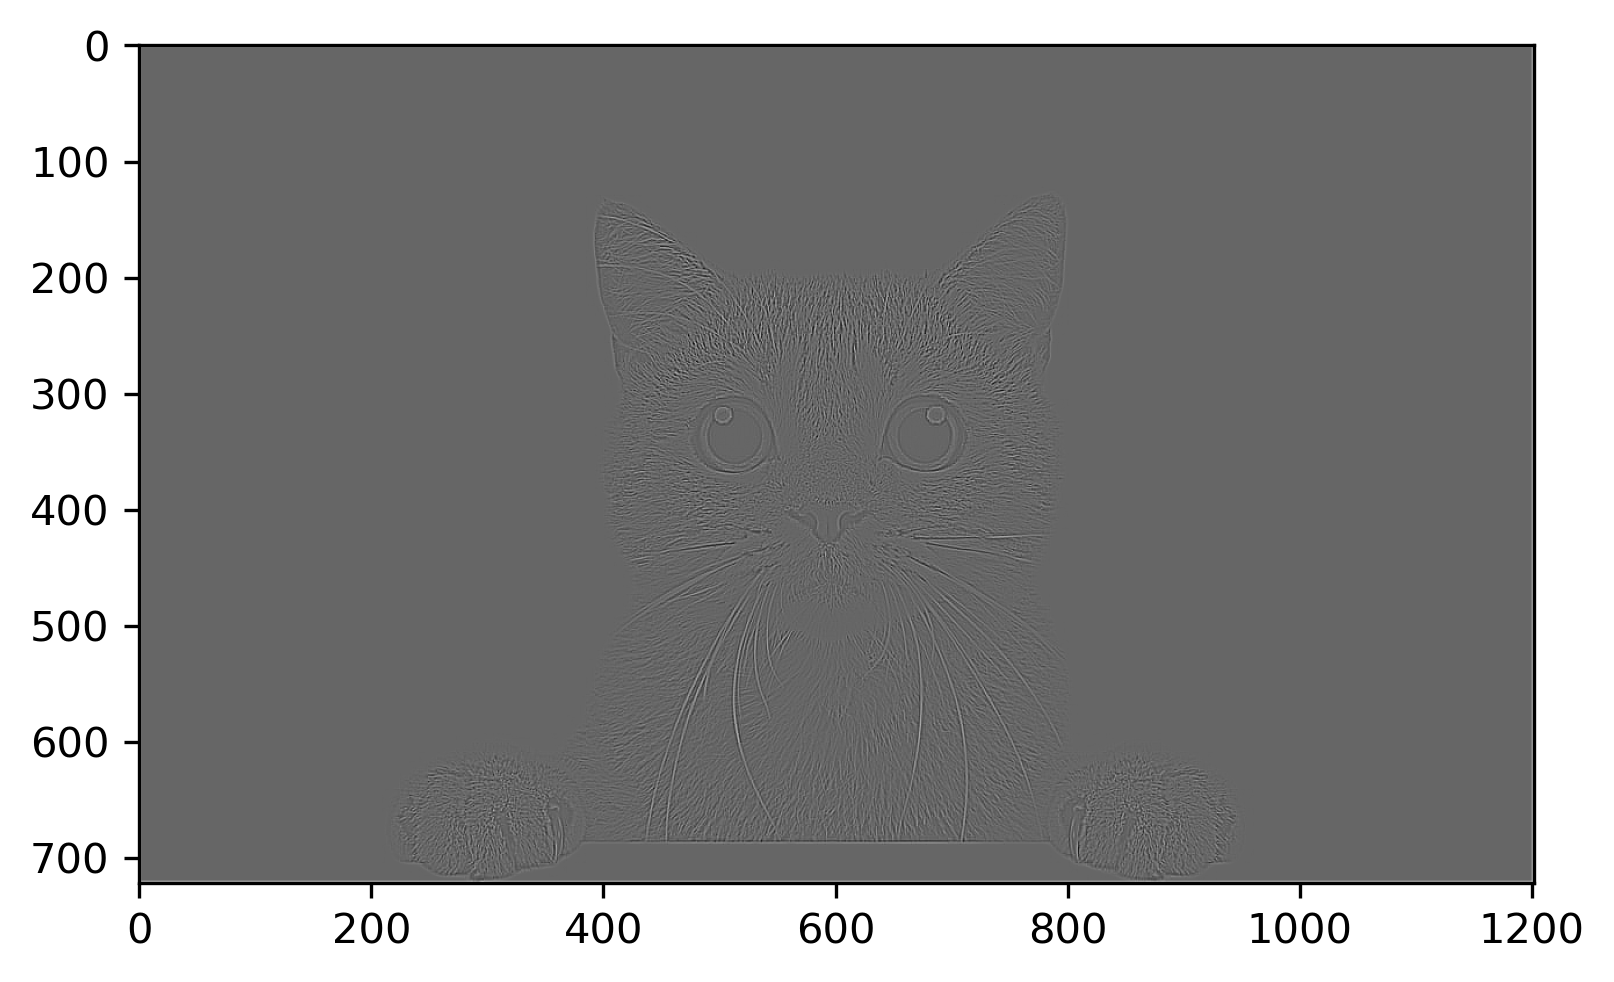

In [3]:
check =np.sum(plt.imread("cat.jpg"),axis=2)

plt.figure(dpi=300)
plt.imshow(check, cmap='gray', interpolation='nearest')

edge_filter = np.array([[-1, -1, -1],

                   [-1, 8, -1],

                   [-1, -1, -1]]) 

grad = signal.convolve2d(check, edge_filter)

plt.figure(dpi=300)
plt.imshow(grad, cmap="gray")

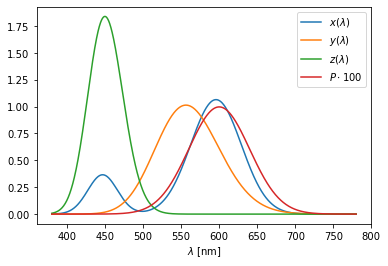

In [4]:
def gaussian(x, mu, sigma):
    return np.exp(-1/2*(x - mu)**2/sigma**2)

def x(lamb):
    return 1.065*gaussian(lamb, 595.8, 33.33) + 0.366*gaussian(lamb, 446.8, 19.44)

def y(lamb):
    return 1.014*gaussian(np.log(lamb), np.log(556.3), 0.075)

def z(lamb):
    return 1.839*gaussian(np.log(lamb), np.log(449.8), 0.051)

def P(lamb):
    sigma = 40
    mu = 600
    W = 1
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-1/2*(lamb-mu)**2/sigma**2)*W

lamb = np.linspace(380,780, 1000)
plt.plot(lamb, x(lamb), label="$x(\lambda)$")
plt.plot(lamb, y(lamb), label="$y(\lambda)$")
plt.plot(lamb, z(lamb), label="$z(\lambda)$")
plt.plot(lamb, P(lamb)*100, label="$P\cdot 100$")
plt.xlabel("$\lambda$ [nm]")
plt.legend()


In [126]:
X = np.trapz(x(lamb)*P(lamb), lamb)
Y = np.trapz(y(lamb)*P(lamb), lamb)
Z = np.trapz(z(lamb)*P(lamb), lamb)
print(X,Y,Z)

0.679965629678 0.569241873225 0.00561766834635


In [127]:
x = X/(X+Y+Z)
y = Y/(X+Y+Z)
z = 1-x-y
print(x,y,z)

0.541880769734 0.453642376856 0.00447685340959


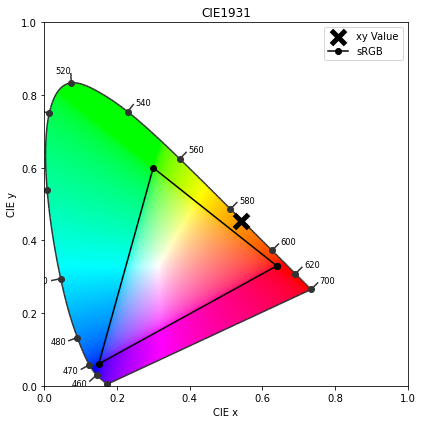

In [128]:
fig,ax = plt.subplots(1,1, figsize=(6,6))

sRGB_gamut = np.array([[0.64, 0.33], [0.30, 0.60], [0.15, 0.06], [0.64, 0.33]])

ax.scatter(x, y, c="black", s=200, marker="x", linewidths=5.0, label="xy Value")
ax.plot(sRGB_gamut[:,0], sRGB_gamut[:,1], "o-", color="black", label="sRGB")
plt.legend()

fig, ax = colour.plotting.diagrams.plot_chromaticity_diagram(fig=fig, axes=ax, title="CIE1931")  
#fig, ax = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB, fig=fig, axes=ax, title="CIE1931")
plt.show()

[ 1.3255933   0.40906978 -0.07236535]


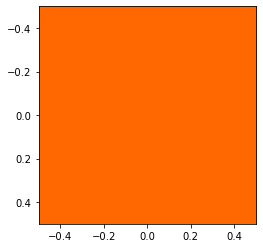

In [129]:
M = np.array([ [3.2404542, -1.5371385, -0.4985314],
               [-0.9692660, 1.8760108, 0.0415560],
               [0.0556434, -0.2040259, 1.0572252]])

rgb = M@np.array([X,Y,Z])

print(rgb)
plt.imshow([[np.clip(rgb,0,1)]])

[ 1.13146774  0.67194904 -0.93496026]


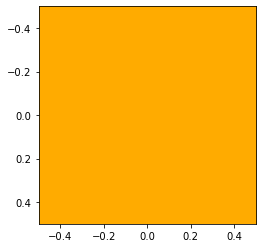

In [130]:
def adj(C):
    if (C < 0.0031308):
        return 12.92 * C
    return 1.055 * np.power(C,0.41666) - 0.055

sRGB = np.nan_to_num([adj(C) for C in rgb])

print(sRGB)
plt.imshow([[np.clip(sRGB,0,1)]])

[ 1.13149374  0.67203988 -0.93428888]


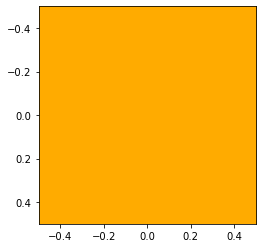

In [131]:
srgb = colour.XYZ_to_sRGB([X,Y,Z])
print(srgb)
plt.imshow([[np.clip(srgb,0,1)]])

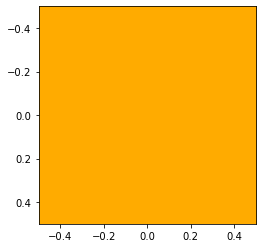

In [132]:
rgb = colour.XYZ_to_RGB([X,Y,Z],illuminant_XYZ, 
                                                                                   illuminant_RGB, 
                                                                                   matrix_XYZ_to_RGB, 
                                                                                   chromatic_adaptation_transform)
plt.imshow([[np.clip(srgb,0,1)]])